In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F

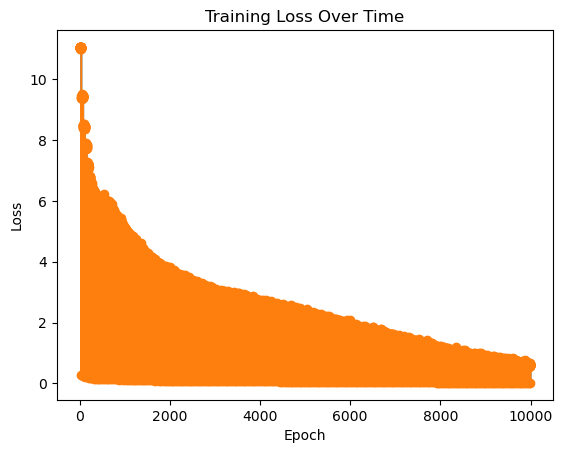

In [ ]:
training_loss= np.load('training_cos_small.npy')
learning_rates = np.load('learnin_rates_cos_small.npy')
validation_loss = np.load('validation_cos_small.npy')

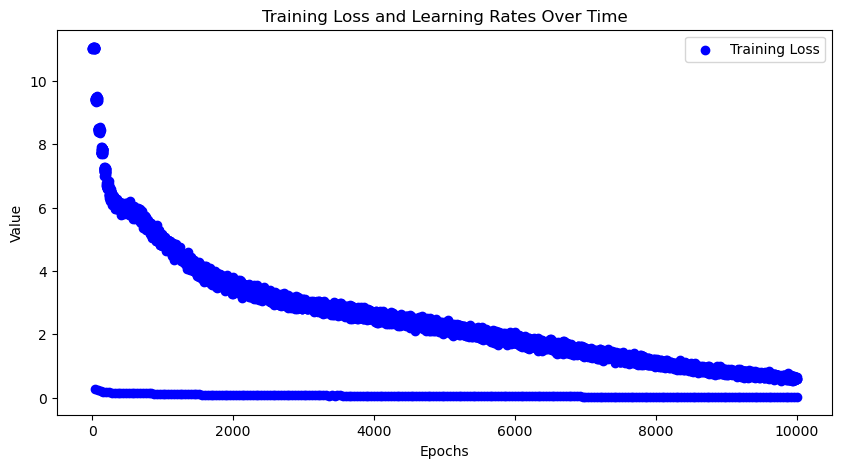

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
training_loss = np.load('training_cos_small.npy')
learning_rates = np.load('learnin_cos_small.npy')

# Create x-axis (assuming each point corresponds to an epoch)
epochs = np.arange(1, len(training_loss) + 1)

# Plot
plt.figure(figsize=(10, 5))

# Scatter plot for Training Loss
plt.scatter(epochs, training_loss, color='blue', label="Training Loss")


# Labels
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Training Loss and Learning Rates Over Time")

# Legend
plt.legend()

plt.show()


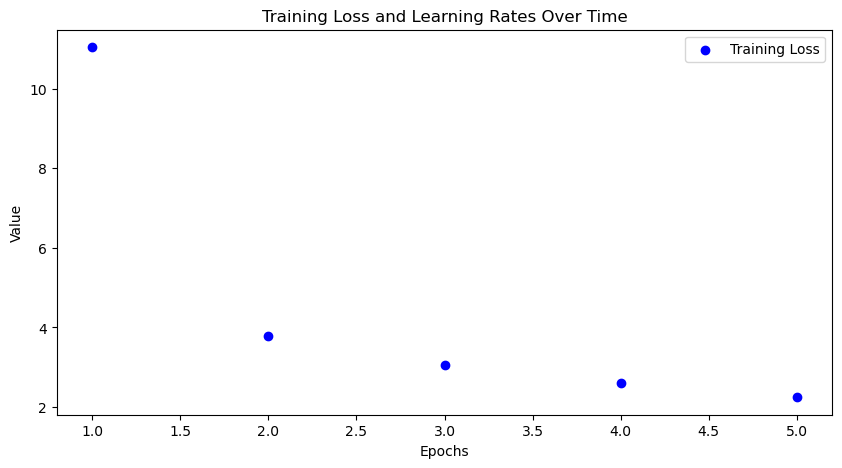

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
validation_loss = np.load('validation_cos_small.npy')


# Create x-axis (assuming each point corresponds to an epoch)
epochs = np.arange(1, len(validation_loss) + 1)

# Plot
plt.figure(figsize=(10, 5))

# Scatter plot for Training Loss
plt.scatter(epochs, validation_loss, color='blue', label="Training Loss")


# Labels
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Training Loss and Learning Rates Over Time")

# Legend
plt.legend()

plt.show()


In [25]:
tt = np.memmap('train_small_2.bin', dtype='float32', mode='r')
print(len(tt))
ttv = np.memmap('val_small_2.bin', dtype='float32', mode='r')
print(len(ttv))
print(len(ttv)/len(tt))

331044
3528
0.010657193605683837


In [6]:
import pandas as pd
df = pd.read_csv('data/dataframe_testing_original.csv')
df

,Title,Author,Link,Bookshelf,Text
0,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various",http://www.gutenberg.org/ebooks/30221,Animal,"﻿The Project Gutenberg eBook of Birds, Illustr..."
1,Artistic Anatomy of Animals,Édouard Cuyer,http://www.gutenberg.org/ebooks/38315,Animal,﻿The Project Gutenberg eBook of Artistic Anato...
2,What Bird is That?,Frank M. Chapman,http://www.gutenberg.org/ebooks/31751,Animal,﻿The Project Gutenberg eBook of What Bird is T...
3,On Snake-Poison: Its Action and Its Antidote,A. Mueller,http://www.gutenberg.org/ebooks/32947,Animal,﻿The Project Gutenberg eBook of On Snake-Poiso...
4,Deadfalls and Snares,A. R. Harding,http://www.gutenberg.org/ebooks/34110,Animal,﻿The Project Gutenberg eBook of Deadfalls and ...
...,...,...,...,...,...
93,Off to the Wilds: Being the Adventures of Two ...,George Manville Fenn,http://www.gutenberg.org/ebooks/21359,Animals-Wild-Trapping,﻿The Project Gutenberg eBook of Off to the Wil...
94,The Hunters' Feast: Conversations Around the C...,Mayne Reid,http://www.gutenberg.org/ebooks/23499,Animals-Wild-Trapping,﻿The Project Gutenberg eBook of The Hunters' F...
95,The Giraffe Hunters,Mayne Reid,http://www.gutenberg.org/ebooks/27911,Animals-Wild-Trapping,﻿The Project Gutenberg eBook of The Giraffe Hu...
96,Dead Man's Land,George Manville Fenn,http://www.gutenberg.org/ebooks/23922,Animals-Wild-Trapping,﻿The Project Gutenberg eBook of Dead Man's Lan...


In [17]:
(df.iloc[2]['Text'])

'\ufeffThe Project Gutenberg eBook of What Bird is That? This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: What Bird is That? Author: Frank M. Chapman Illustrator: Edmund J. Sawyer Release date: March 23, 2010 [eBook #31751] Most recently updated: January 6, 2021 Language: English Credits: Produced by Chris Curnow, Joseph Cooper, Emmy and the Online Distributed Proofreading Team at https://www.pgdp.net *** START OF THE PROJECT GUTENBERG EBOOK WHAT BIRD IS THAT? *** Produced by Chris Curnow, Joseph Cooper, Emmy and the Online Distributed Proofreading Team at https://www.pgdp.net Transcriber\'s 

In [16]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
enc.encode('<>')
enc.decode([0])
enc.encode(' ')

[220]

In [2]:
import pandas as pd
df = pd.read_csv('data/dataframe_testing.csv', nrows=100)
df.head(20)

,Title,Author,Link,Bookshelf,Text
0,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various",http://www.gutenberg.org/ebooks/30221,Animal,"BIRDS, ILLUSTRATED BY COLOR PHOTOGRAPHY, VOL. ..."
1,Artistic Anatomy of Animals,Édouard Cuyer,http://www.gutenberg.org/ebooks/38315,Animal,ARTISTIC ANATOMY OF ANIMALS *** Produced by Ch...
2,What Bird is That?,Frank M. Chapman,http://www.gutenberg.org/ebooks/31751,Animal,WHAT BIRD IS THAT? *** Produced by Chris Curno...
3,On Snake-Poison: Its Action and Its Antidote,A. Mueller,http://www.gutenberg.org/ebooks/32947,Animal,ON SNAKE-POISON: ITS ACTION AND ITS ANTIDOTE *...
4,Deadfalls and Snares,A. R. Harding,http://www.gutenberg.org/ebooks/34110,Animal,DEADFALLS AND SNARES *** Produced by Linda M. ...
5,A Guide for the Study of Animals,"Lucas, Shinn, Smallwood, and Whitney",http://www.gutenberg.org/ebooks/34984,Animal,A GUIDE FOR THE STUDY OF ANIMALS *** Produced ...
6,Fifty Years a Hunter and Trapper,E. N. Woodcock,http://www.gutenberg.org/ebooks/34063,Animal,FIFTY YEARS A HUNTER AND TRAPPER *** Produced ...
7,Our Vanishing Wild Life: Its Extermination and...,William T. Hornaday,http://www.gutenberg.org/ebooks/13249,Animal,OUR VANISHING WILD LIFE: ITS EXTERMINATION AND...
8,The Extermination of the American Bison,William T. Hornaday,http://www.gutenberg.org/ebooks/17748,Animal,THE EXTERMINATION OF THE AMERICAN BISON *** Pr...
9,Wolf and Coyote Trapping: An Up-to-Date Wolf H...,A. R. Harding,http://www.gutenberg.org/ebooks/34501,Animal,WOLF AND COYOTE TRAPPING: AN UP-TO-DATE WOLF H...


In [31]:
df.iloc[0]['Text']  
ids = enc.encode(df.iloc[0]['Text'])
ids
ids[32-32:10]
enc.decode(ids[32:100])


" NATIONAL TEACHERS' ASSOCIATION. _STATE OF NEW YORK_ _Department of Public Instruction_ _SUPERINTENDENT'S OFFICE_ _Albany_ December 26, 1896. [Illustration: (seal)] _Stenographic Letter_ Dictated by __________ W. E"

In [19]:
enc.encode(df.iloc[0]['Author'])

[10258, 32461, 11, 4709, 13, 352, 11, 1400, 13, 352, 26386]

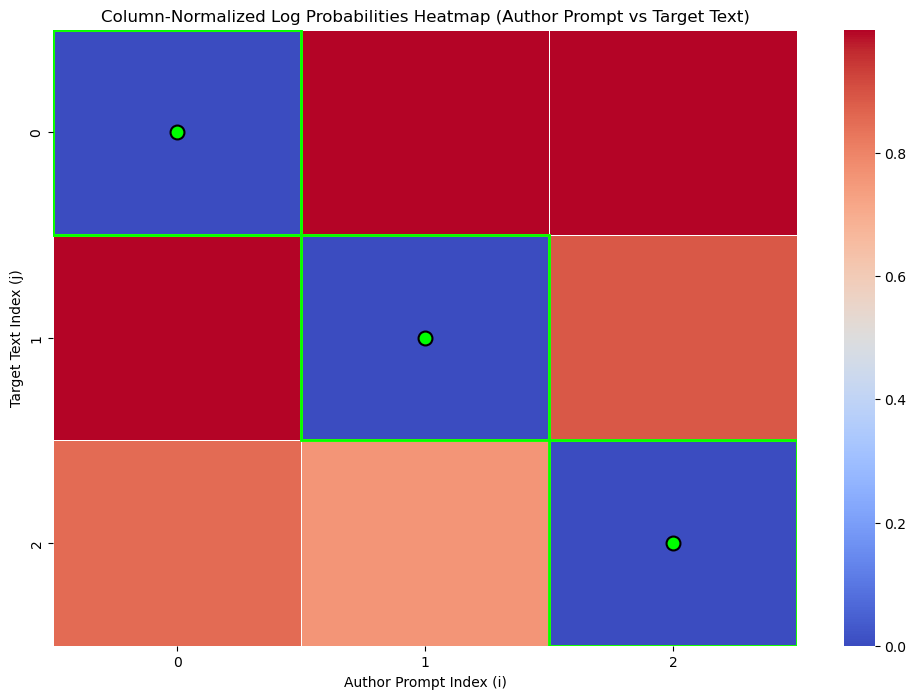

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heat(log_prob_matrix):
    # Normalize each column independently
    col_min = log_prob_matrix.min(axis=0, keepdims=True)  # Min per column
    col_max = log_prob_matrix.max(axis=0, keepdims=True)  # Max per column
    norm_matrix = (log_prob_matrix - col_min) / (col_max - col_min + 1e-8)  # Avoid div by zero
    
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(norm_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

    # Highlight diagonal elements where i == j
    for i in range(log_prob_matrix.shape[0]):
        ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
    min_indices = np.argmin(log_prob_matrix, axis=0)  # Indices of min values per column
    for col, row in enumerate(min_indices):
        plt.scatter(col + 0.5, row + 0.5, color='lime', s=100, edgecolors='black', lw=1.5, marker='o')  # Green markers
        ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=False, edgecolor='lime', lw=2))  # Green border

    plt.title("Column-Normalized Log Probabilities Heatmap (Author Prompt vs Target Text)")
    plt.xlabel("Author Prompt Index (i)")
    plt.ylabel("Target Text Index (j)")
    plt.show()

# Example matrix
log_prob_matrix = np.array([
    [5.91432778, 4.71240288, 7.81690182],
    [7.2828649,  3.46639168, 7.55765952],
    [7.08411837, 4.41447231, 5.48361463]
])

plot_heat(log_prob_matrix)
